# Exploratory Data Analysis

In this section, we will outline our exploratory data analysis workflow in order to better understand the characteristics of properties and how they relate to property sale price.

In [386]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [493]:
# opening cleaned dataset
housing_data = pd.read_csv('KC_Data/cleaned_housing_data', index_col = 0)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29162 entries, 0 to 29161
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29162 non-null  float64
 1   bedrooms       29162 non-null  int64  
 2   bathrooms      29162 non-null  float64
 3   sqft_living    29162 non-null  int64  
 4   sqft_lot       29162 non-null  int64  
 5   floors         29162 non-null  float64
 6   waterfront     29162 non-null  object 
 7   greenbelt      29162 non-null  object 
 8   nuisance       29162 non-null  object 
 9   condition      29162 non-null  object 
 10  grade          29162 non-null  int64  
 11  sqft_above     29162 non-null  int64  
 12  sqft_basement  29162 non-null  int64  
 13  sqft_garage    29162 non-null  int64  
 14  sqft_patio     29162 non-null  int64  
 15  yr_built       29162 non-null  int64  
 16  yr_renovated   29162 non-null  int64  
 17  lat            29162 non-null  float64
 18  long  

In [495]:
housing_data['city'].unique()

array(['Renton', 'Seattle', 'Issaquah', 'Kent', 'Federal Way', 'Duvall',
       'Auburn', 'Bellevue', 'Maple Valley', 'Woodinville', 'Redmond',
       'Medina', 'North Bend', 'Bothell', 'Kirkland', 'Mercer Island',
       'Carnation', 'Snoqualmie', 'Enumclaw', 'Sammamish', 'Fall City',
       'Kenmore', 'Black Diamond', 'Pacific', 'Vashon', 'Skykomish',
       'Ravensdale', 'Milton', 'Preston', 'Baring'], dtype=object)

In [292]:
# creating a pairplot for entire dataframe
sns.pairplot(housing_data)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000018660D75040> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018663117F70> (for post_execute):


KeyboardInterrupt: 

## Price
To better understand `price`, let's look at the distribution.

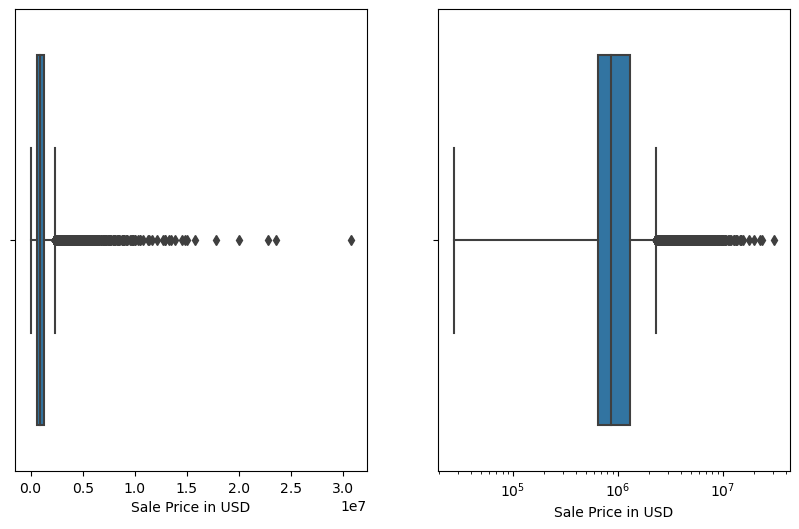

In [381]:
fig, ax = plt.subplots(1,2, figsize = (10, 6))
ax[0] = sns.boxplot(x = housing_data['price'], data = housing_data, ax = ax[0])
ax[1] = sns.boxplot(x = housing_data['price'], data = housing_data, ax = ax[1])
ax[0].set_xlabel("Sale Price in USD")
ax[1].set_xlabel("Sale Price in USD")
ax[1].set_xscale('log')

A side-by-side comparision using different `x_axis` scaling (left = standard, right = log). We can see that our distribution has a lot of outliers, or properties that were sold above ~ 2.5 mil USD resulting in a tight, hard to understand box plot. The right plot tells us that the distribution of properties' sale price is concentrated around 1 mil USD.

For a more robust analysis and to be able to narrow our focus on properties where the distribution of prices is more concentrated, we shall use the IQR to calculate our upper bound ('whisker') and use that to filter out our desired sample. Let's call our new dataframe `develop_houses`.

In [382]:
#calculating IQR for house price to filter out outliers 
iqr = (housing_data[['price']].quantile(0.75))- (housing_data[['price']].quantile(0.25))
upper_bound = housing_data['price'].quantile(0.75) + (1.5 * iqr)
price_min = housing_data['price'].min()
print(f"The distribution of properties' sale price falls between ${price_min} USD  ${upper_bound[0]} USD")

The distribution of properties' sale price falls between $27360.0 USD  $2307500.0 USD


Based on the IQR for housing prices, we can filter out records that fall between the absolute minimum `($27,360 USD)` and the upper bound of the distribution `($2,307,500 USD)`. Let's look at our new distribution compared to the previous using the same `x_axis` scale 

In [476]:
# filtering out our dataframe to only include prices within the IQR
develop_houses = housing_data[(housing_data['price'] >= 27360) & (housing_data['price'] <= 2307500)]
develop_houses

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      675000.0         4        1.0         1180      7140     1.0   
1      750000.0         3        2.0         1830      7969     1.0   
2      728000.0         4        2.0         2170      7520     1.0   
3      565000.0         4        2.0         1400     10364     1.5   
4      645000.0         3        2.0         1520      8250     1.0   
...         ...       ...        ...          ...       ...     ...   
29157  750000.0         3        1.0         1530     33250     1.5   
29158  315000.0         1        1.0          480      7475     1.0   
29159  250000.0         2        1.0         1040    114998     1.0   
29160  202000.0         2        1.0         1260     11160     1.5   
29161  199000.0         2        1.0         1150     10098     1.5   

      waterfront greenbelt nuisance  condition  grade  sqft_above  \
0             NO        NO       NO       Good      7        1180   
1             NO        NO       NO    Average      7         930   
2             NO        NO       NO    Average      7        1240   
3             NO        NO       NO       Good      6        1400   
4             NO        NO       NO    Average      8        1190   
...          ...       ...      ...        ...    ...         ...   
29157         NO        NO       NO  Very Good      6        1530   
29158         NO        NO      YES    Average      6         480   
29159         NO        NO      YES       Fair      6        1040   
29160         NO        NO      YES    Average      5        1260   
29161         NO        NO      YES    Average      6        1150   

       sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0                  0            0          40      1969             0   
1                930          240          90      1950          2008   
2               1240          490          60      1973             0   
3                  0          330         330      1971             0   
4                590          420         200      1981             0   
...              ...          ...         ...       ...           ...   
29157            110            0         360      1904             0   
29158              0            0           0      1908          1970   
29159              0            0           0      1928             0   
29160              0            0         110      1918             0   
29161              0            0         220      1972             0   

             lat        long  zipcode  sold_year  sold_month  age_sold  \
0      47.461975 -122.190520    98055       2022           5        53   
1      47.466730 -122.214000    98055       2022           3        72   
2      47.463930 -122.189740    98055       2022           3        49   
3      47.448450 -122.212430    98055       2022           3        51   
4      47.460870 -122.188690    98055       2021          12        40   
...          ...         ...      ...        ...         ...       ...   
29157  47.523720 -121.931440    98050       2021           9       117   
29158  47.736450 -121.425310    98224       2021           7       113   
29159  47.769670 -121.480570    98224       2021          11        93   
29160  47.772445 -121.483665    98224       2021          10       103   
29161  47.766720 -121.482380    98224       2021           8        49   

       renovated     city  
0          False   Renton  
1           True   Renton  
2          False   Renton  
3          False   Renton  
4          False   Renton  
...          ...      ...  
29157      False  Preston  
29158       True   Baring  
29159      False   Baring  
29160      False   Baring  
29161      False   Baring  

[27290 rows x 25 columns]

Text(0.5, 0, 'Sale Price in USD (in millions USD)')

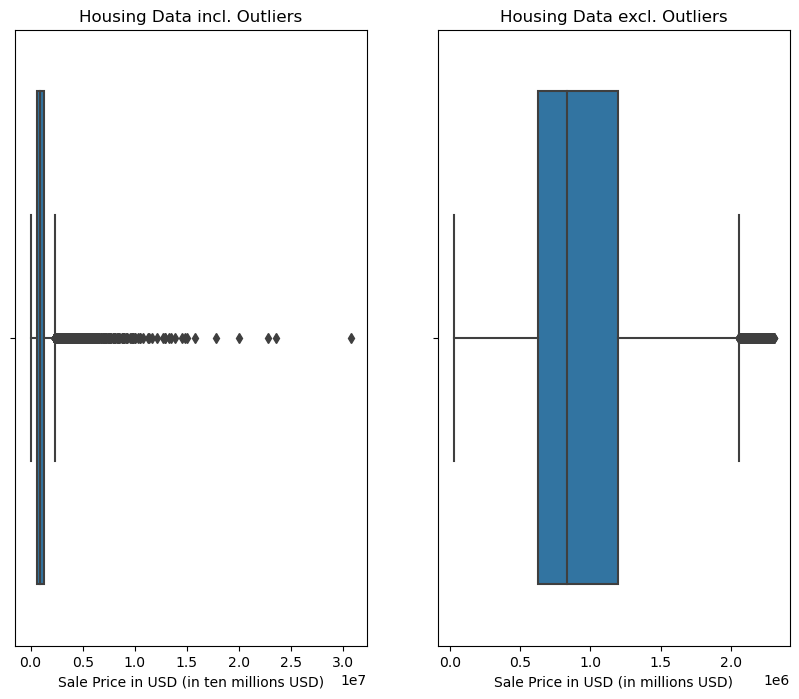

In [384]:
# creating a side-by-side comparision before and after filtering records
fig, ax = plt.subplots(1,2, figsize = (10, 8))
ax[0] = sns.boxplot(x = housing_data['price'], data = housing_data, ax = ax[0])
ax[0].set_title("Housing Data incl. Outliers")
ax[0].set_xlabel("Sale Price in USD (in ten millions USD)")
ax[1].set_title("Housing Data excl. Outliers")
ax[1] = sns.boxplot(x = develop_houses['price'], data = develop_houses, ax = ax[1])
ax[1].set_xlabel("Sale Price in USD (in millions USD)")

After filtering prices based on the IQR of the entire dataset, we have a narrower focus on the kinds of properties our model will take into consideration. Our new dataset considers all properties that have been sold at a price range between `($27,360 USD)` and `($2,307,500 USD)`.

## Property Infrastructure 
This section will cover an EDA of property characteristics (e.g., `grade`, `condition`) in relation to `price`.

First, let's create a subset of columns corresponding to property infrastructure `prop_infra`.

In [517]:
# creating a new dataframe containing price and all features related to property infrastructure
prop_infra = develop_houses.loc[:,['price','condition', 'grade', 'renovated']]

### Property Construction Quality

`grade` in our dataset refers to the construction quality of improvements. Lower scores indicate that the properties are generally older and have lower construction quality. Higher scores indicate that the property may have more detailed finish and luxury features. For detailed information on each grade value refer to documentated found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

In [390]:
# viewing the value counts for building grade
prop_infra['grade'].value_counts().sort_index()

2         1
3         8
4        48
5       382
6      2816
7     11456
8      8657
9      3047
10      755
11      108
12       11
13        1
Name: grade, dtype: int64

Text(0, 0.5, 'Property Sale Price (in millions USD)')

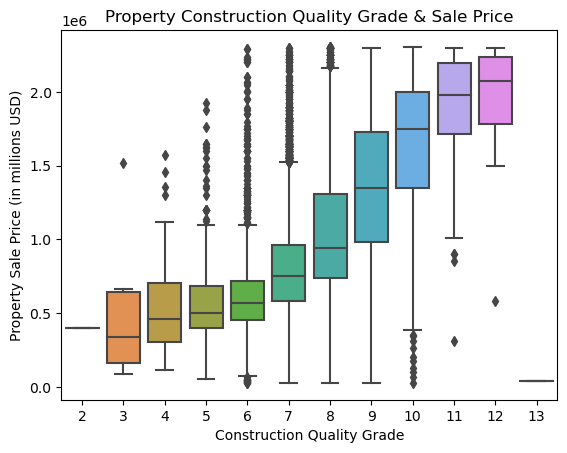

In [391]:
# plotting grade in relation to property sale price
ax = sns.boxplot(x = 'grade', y = 'price', data = prop_infra)
ax.set_title("Property Construction Quality Grade & Sale Price")
ax.set_xlabel("Construction Quality Grade")
ax.set_ylabel("Property Sale Price (in millions USD)")

In relation to `grade`, we can see that when a property has a higher construction quality (i.e., has better materials and amenities), the median property sale price increases. The greatest change in median sale price for properties occurs when construction quality has a grade of at least 6. 

### Property Condition
`condition` in our datset refers to the property's condition in relation to `age` and `grade`. Buildings with `poor` condition refer to properties in major disrepair whereas `very good` includes properties that are well-maintained.

In [392]:
# converting prop_infra into a category dtype
prop_infra['condition'] = prop_infra['condition'].astype('category')

In [393]:
# viewing the number of categories related to building condition
prop_infra['condition'].unique()

['Good', 'Average', 'Very Good', 'Fair', 'Poor']
Categories (5, object): ['Average', 'Fair', 'Good', 'Poor', 'Very Good']

In [394]:
# reordering categories based on dataset information and for easier plotting
prop_infra['condition'] = prop_infra['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

Text(0, 0.5, 'Property Sale Price (in millions USD)')

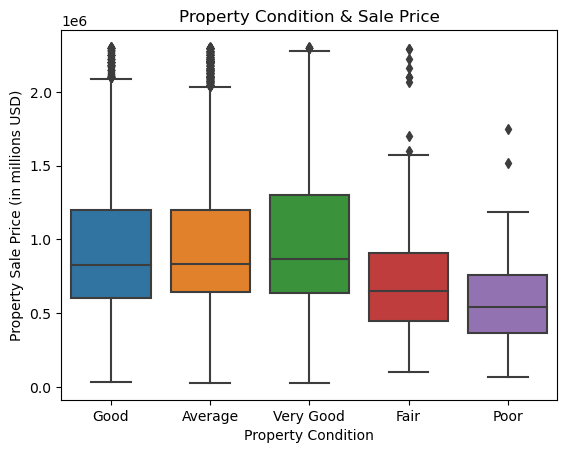

In [518]:
# plotting building condition in relation to property sale price 
ax = sns.boxplot(x = 'condition', y = 'price', data = prop_infra)
ax.set_title("Property Condition & Sale Price")
ax.set_xlabel("Property Condition")
ax.set_ylabel("Property Sale Price (in millions USD)")

Based on our boxplot, we can see that the condition of the property contributes to an increased median sale price when condition is at least `Average`

### Building Renovations
`renovated` in our dataset considers whether a property had any renovations made prior to being listed and sold. 

In [396]:
# converting boolean column to integer where:
# 0 = False (house was not renovated)
# 1 = False (house was renovated)
#housing_data['renovated'] = housing_data['renovated'].astype(int)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

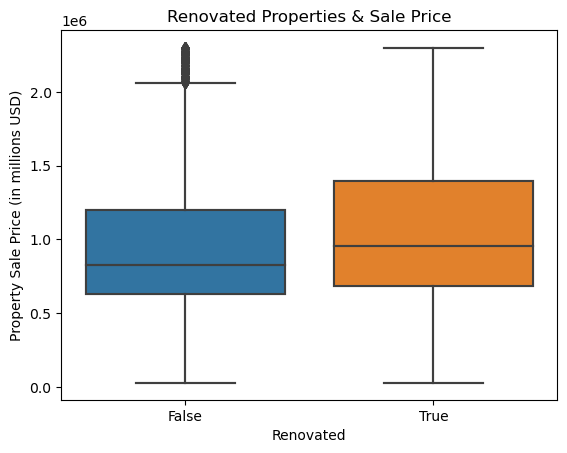

In [397]:
# plotting median property sale price by property renovations
sns.boxplot(x = 'renovated', y = 'price', data = prop_infra)
ax = sns.boxplot(x = 'renovated', y = 'price', data = prop_infra)
ax.set_title("Renovated Properties & Sale Price")
ax.set_xlabel("Renovated")
ax.set_ylabel("Property Sale Price (in millions USD)")

Based on our boxplot, properties that were renovated have an increased median sale price compared to properties that did not have any renovations done when they were sold.

<Axes: >

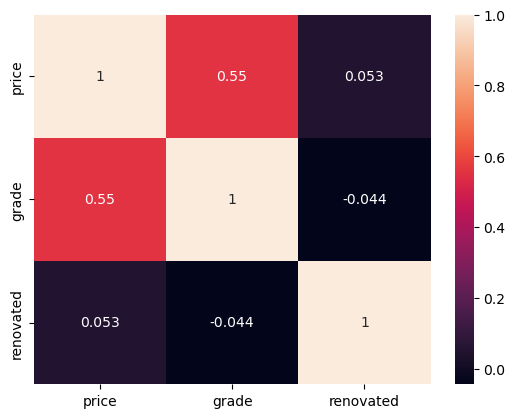

In [415]:
sns.heatmap(prop_infra.corr(numeric_only = True), annot=True)

## Interior Property Features
This section will cover an EDA of interior property features (e.g., `bedrooms`, `bathrooms`, `floors`, etc...) 

In [416]:
# creating a new dataframe containing price and related interior property characteristics
interior_feat = develop_houses.loc[:, ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']]

### Bedrooms

Text(0, 0.5, 'Property Sale Price (in millions USD)')

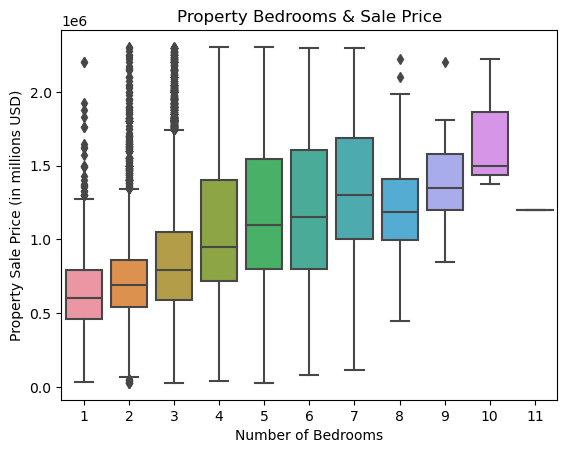

In [417]:
# plotting number of bedrooms in relation to property sale price 
ax = sns.boxplot(x = 'bedrooms', y = 'price', data = develop_houses)
ax.set_title("Property Bedrooms & Sale Price")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Property Sale Price (in millions USD)")

Properties have an increased median sale price when the number of bedrooms < = 7, however when bedrooms exceed 7, property value (i.e., median sale price) decreases.

### Bathrooms

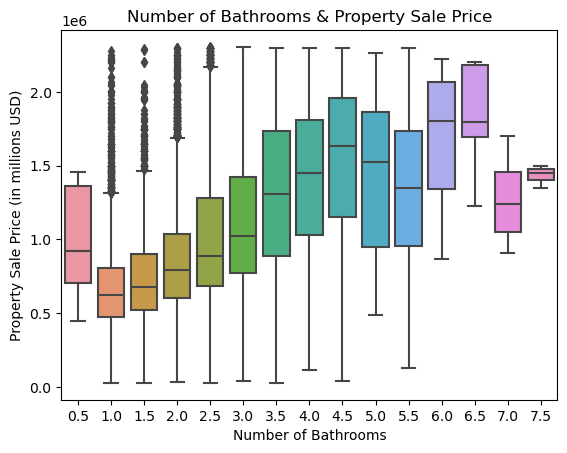

In [514]:
# plotting number of bathrooms in relation to property sale price 
ax = sns.boxplot(x = 'bathrooms', y = 'price', data = develop_houses)
ax.set_title("Number of Bathrooms & Property Sale Price")
ax.set_xlabel("Number of Bathrooms")
ax.set_ylabel("Property Sale Price (in millions USD)")
plt.savefig("bathroomrenov.jpg", dpi = 300)

When properties have ~ 4.5 bathrooms, they have the highest median sale price when they are sold. Where properties have ~ 5 - 5.5 bathrooms, median sale price dips. 

### Living Space (sqft)
`sqft_living` in our dataset refers to the square footage of the living space in the home. However, we find it important to look at the distribution first to better understand the properties within the dataset.

Text(0.5, 0, 'Living Space (sqft)')

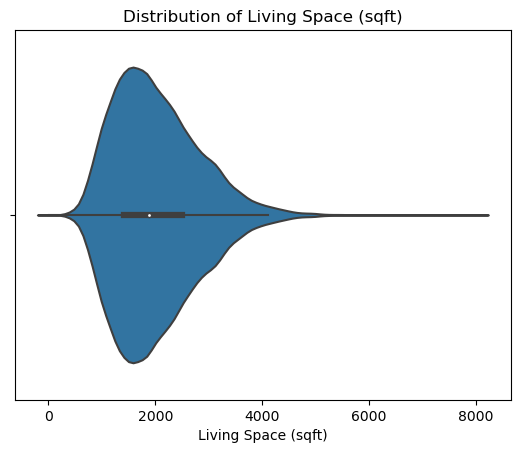

In [419]:
# plotting the distribution of living space in sqft
ax = sns.violinplot(x = develop_houses['sqft_living'])
ax.set_title("Distribution of Living Space (sqft)")
ax.set_xlabel("Living Space (sqft)")

The violinplot maps out the distribution of `sqft_living` and tells us that the majority of properties have living spaces concentrated around 2,000 sqft. `sqft_living` is a skewed-right distribution. If we plot `sqft_living` in relation to `price`, it will be hard to visualize. For cleaner visualization, let's calculate the IQR for `sqft_living` and create corresponding bins based on quantiles to better understand the relationship between `sqft_living` and `price`.

In [420]:
# viewing the IQR for living space 
interior_feat['sqft_living'].describe()

count    27290.000000
mean      2009.611799
std        803.315221
min          3.000000
25%       1410.000000
50%       1890.000000
75%       2490.000000
max       8020.000000
Name: sqft_living, dtype: float64

In [421]:
# creating bins based on the quantiles for living space
pd.qcut(interior_feat['sqft_living'], q=4)

# creating a new column based on the quantiles / bins
interior_feat['living_space'] = pd.qcut(interior_feat['sqft_living'], q=4)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

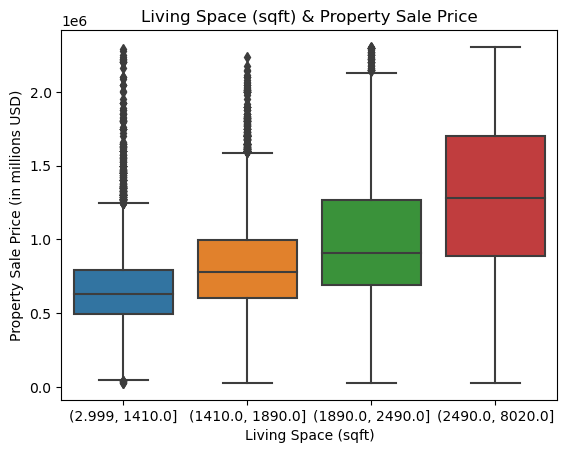

In [422]:
# plotting living space as quantiles in relation to property sale price 
ax = sns.boxplot(x = 'living_space', y = 'price', data = interior_feat)
ax.set_title("Living Space (sqft) & Property Sale Price")
ax.set_xlabel("Living Space (sqft)")
ax.set_ylabel("Property Sale Price (in millions USD)")

After binning, we can see that properties with larger living spaces have an increased property sale price. Where 50% of properties are contained, that is data contained within the 2nd and 3rd box plots, an increse in `living space` (sqft) contributes to a greater median sale price. 

### Basement

Let's examine whether properties that have a basement or not have any effect in property sale price.

In [423]:
# creating a new column 'basement' that assumes boolean values based on whether there is a basement in properties sold
interior_feat['basement'] = interior_feat['sqft_basement'] != 0 

Text(0, 0.5, 'Property Sale Price (in millions USD)')

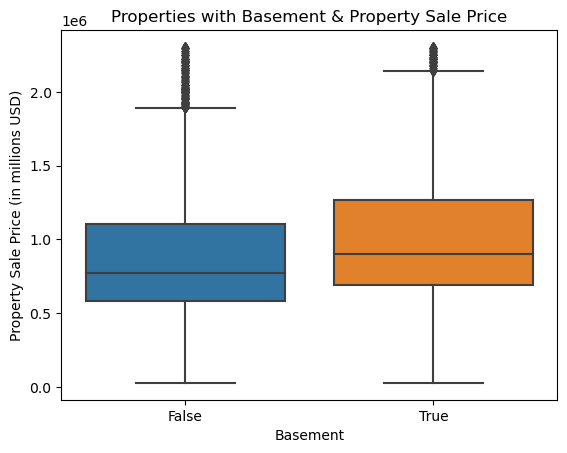

In [424]:
ax = sns.boxplot(x = 'basement', y = 'price', data = interior_feat)
ax.set_title("Properties with Basement & Property Sale Price")
ax.set_xlabel("Basement")
ax.set_ylabel("Property Sale Price (in millions USD)")

After filtering properties with basements and those without, we can see that among those that do have a basement, regardless of the values of `sqft_basement`, properties have an increased median sale price.

### Correlation Matrix

In [426]:
interior_feat_corr = interior_feat.drop(columns = ['price'])

<Axes: >

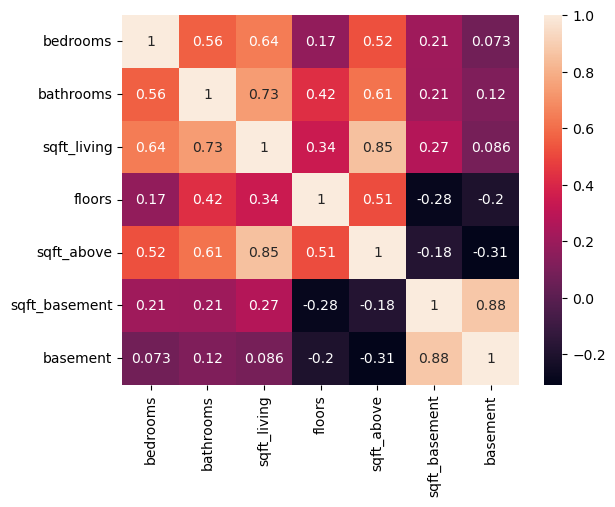

In [428]:
sns.heatmap(interior_feat_corr.corr(numeric_only = True), annot=True)

## Exterior Property Features
This section will cover an EDA of external property features (e.g. garage & patio sqft)

In [154]:
# creating a new dataframe based on external property features 
exter_feat = develop_houses.loc[:,['price','sqft_lot', 'sqft_garage', 'sqft_patio']]

### Property Size (`sqft_lot`)

Because the range for `sqft_lot` is large, it's helpful to plot it's distribution. This would allow us to visualize the lot sizes (in sqft) where there are a majority of properties within our dataset.

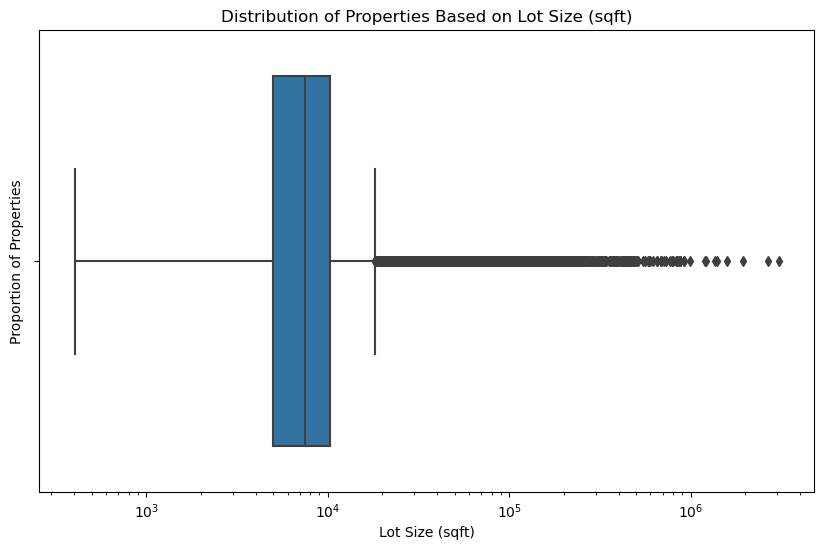

In [155]:
# viewing the distribution of properties based on lot size in sqft 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x = 'sqft_lot', data = exter_feat)
ax.set_xlabel("Lot Size (sqft)")
ax.set_ylabel("Proportion of Properties")
ax.set_title("Distribution of Properties Based on Lot Size (sqft)")
ax.set_xscale('log')

After plotting a boxplot with the distribution of lot sizes, we can see that the overall distribution is not normal but skewed. Looking at the IQR of `sqft_lot`, we see that the distribution of `sqft_lot` has an upperbound of ~ `10,000` sqft. For our purposes, it might be prudent to utilize the IQR and bin our data based on quantiles so as to better understand different bins and their relation to median sale price.

In [156]:
# viewing the IQR range for living space 
exter_feat['sqft_lot'].describe()

count    2.729000e+04
mean     1.604575e+04
std      5.427732e+04
min      4.020000e+02
25%      5.000000e+03
50%      7.445000e+03
75%      1.032000e+04
max      3.067495e+06
Name: sqft_lot, dtype: float64

In [157]:
# creating bins based on the quantiles for living space
pd.qcut(exter_feat['sqft_lot'], q=4)

# creating a new column based on the quantiles / bins
exter_feat['lot_size'] = pd.qcut(exter_feat['sqft_lot'], q=4)

Text(0, 0.5, 'Property Sale Price (in millions USD)')

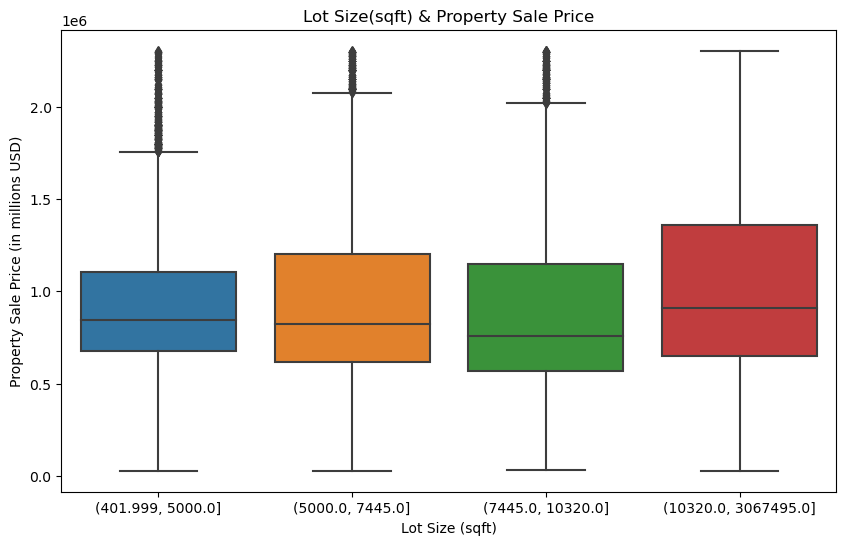

In [158]:
# plotting living space as quantiles in relation to property sale price 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x = 'lot_size', y = 'price', data = exter_feat)
ax.set_title("Lot Size(sqft) & Property Sale Price")
ax.set_xlabel("Lot Size (sqft)")
ax.set_ylabel("Property Sale Price (in millions USD)")

After binning based on the IQR for `sqft_lot`, we can visualize how different `lot_size` categories (i.e., bins) have different median property sale prices. Here, the boxplot indicates that properties with lot sizes towards the end of the scale (10,320 and 3,067,495 sqft) have the highest median sale price. However, it should be noted that this `lot_size` bin contains the absolute maximum **and** outliers, thus the bin width contains a greater range compared to the other three bins. If we focus on the second and third boxplot, which represent our 1st and 3rd quartile (~50% of our data), and thus where the majority of properties exist, `lot_size` has a negligble or negative effect on median sale price. 

### Garage

Let's consider whether the addition of a garage affects property sale price, regardless of `sqft_garage`.

In [159]:
exter_feat['garage'] = exter_feat['sqft_garage'] != 0

Text(0, 0.5, 'Property Sale Price (in millions USD)')

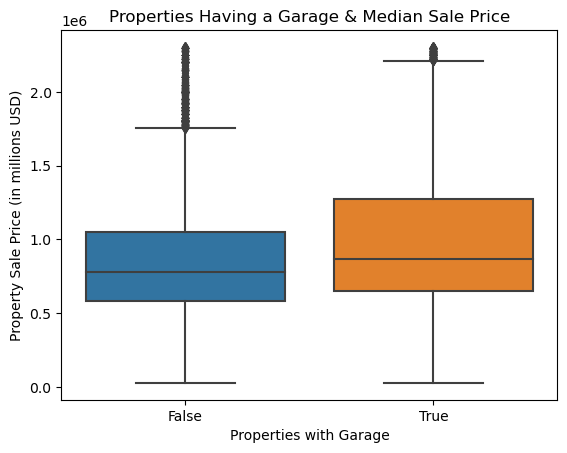

In [160]:
ax = sns.boxplot(x = 'garage', y = 'price', data = exter_feat)
ax.set_title("Properties Having a Garage & Median Sale Price")
ax.set_xlabel("Properties with Garage")
ax.set_ylabel("Property Sale Price (in millions USD)")

After filtering the data based on whether the property has a garage or not, we can see that there is an increase in the median sale price among properties that have a garage vs those that do not. 

### Patio

Let's also do the same for patio. 

In [161]:
# creating a new column 'patio' based on whether the property has a patio or not
exter_feat['patio'] = exter_feat['sqft_patio'] != 0

Text(0, 0.5, 'Property Sale Price (in millions USD)')

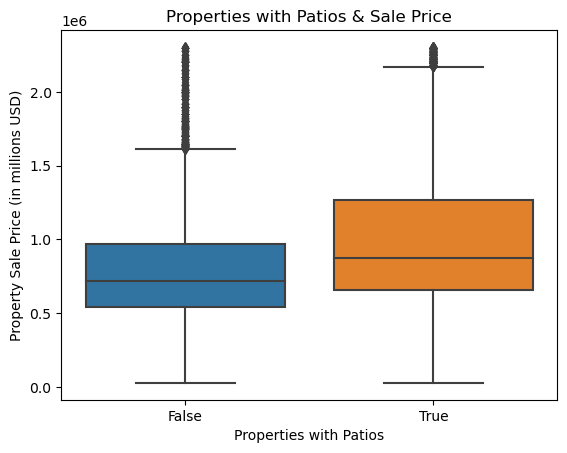

In [162]:
ax = sns.boxplot(x = 'patio', y = 'price', data = exter_feat)
ax.set_title("Properties with Patios & Sale Price")
ax.set_xlabel("Properties with Patios")
ax.set_ylabel("Property Sale Price (in millions USD)")

## Environmental Property Features

In [163]:
# subsetting all features related to property environment
envir_feat = develop_houses.loc[:,['price','waterfront', 'greenbelt', 'nuisance']]

### Waterfront

Text(0, 0.5, 'Property Sale Price (in millions USD)')

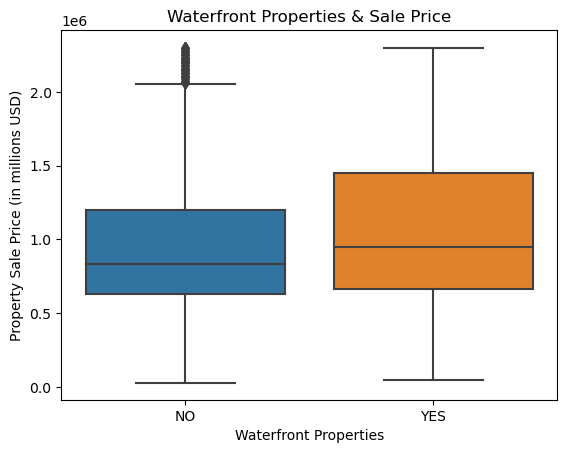

In [164]:
ax = sns.boxplot(x = 'waterfront', y = 'price', data = envir_feat)
ax.set_title("Waterfront Properties & Sale Price")
ax.set_xlabel("Waterfront Properties")
ax.set_ylabel("Property Sale Price (in millions USD)")

### Nuisance

Text(0, 0.5, 'Property Sale Price (in millions USD)')

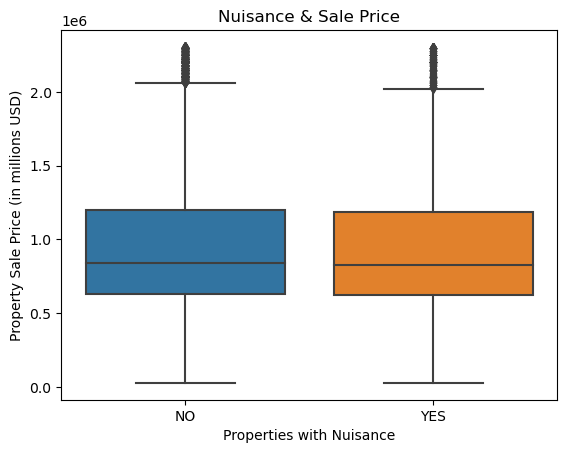

In [165]:
ax = sns.boxplot(x = 'nuisance', y = 'price', data = envir_feat)
ax.set_title("Nuisance & Sale Price")
ax.set_xlabel("Properties with Nuisance")
ax.set_ylabel("Property Sale Price (in millions USD)")

### Greenbelt

Text(0, 0.5, 'Property Sale Price (in millions USD)')

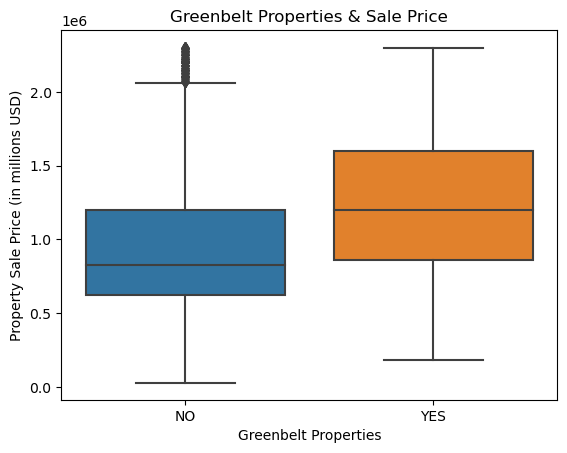

In [166]:
ax = sns.boxplot(x = 'greenbelt', y = 'price', data = envir_feat)
ax.set_title("Greenbelt Properties & Sale Price")
ax.set_xlabel("Greenbelt Properties")
ax.set_ylabel("Property Sale Price (in millions USD)")

## Property Location

In [167]:
housing_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'zipcode', 'sold_year', 'sold_month',
       'age_sold', 'renovated', 'city'],
      dtype='object')

In [131]:
import bokeh

# Import the necessary libraries.
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider

# Create a Bokeh figure.
p = figure()

# Add a tile layer to the figure.
p.add_tile(('CARTODBPOSITRON_RETINA'))

# Add a scatter plot to the figure.
p.scatter(x='lat', y='long', color='price', source = housing_data)

# Set the title of the figure.
p.title = 'Price by Latitude and Longitude'

# Show the figure.
output_notebook()
show(p)

Loading BokehJS ...

In [101]:
# subsetting geographic 
geo_feat = develop_houses.loc[:,['price','zipcode','city','lat','long']]

In [478]:
develop_houses.loc[develop_houses['zipcode'] == '98004']

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, greenbelt, nuisance, condition, grade, sqft_above, sqft_basement, sqft_garage, sqft_patio, yr_built, yr_renovated, lat, long, zipcode, sold_year, sold_month, age_sold, renovated, city]
Index: []

In [498]:
housing_data[housing_data['city'] == 'Bellevue']['zipcode'].unique()

array([98006, 98007, 98008, 98004, 98005], dtype=int64)

In [503]:
bellevue_prop = housing_data[housing_data['city'] == 'Bellevue']

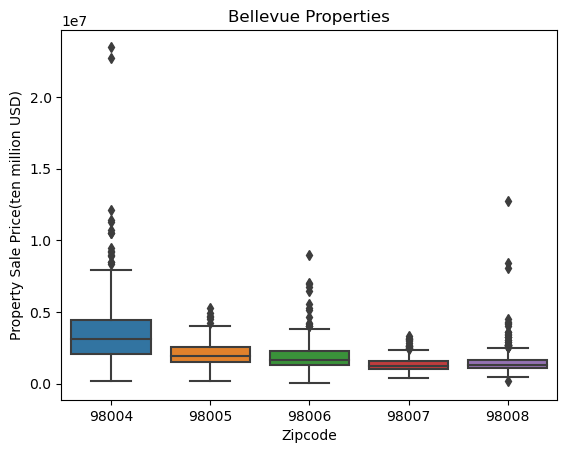

In [512]:
ax = sns.boxplot(x = 'zipcode', y = 'price', data = bellevue_prop)
ax.set_title("Bellevue Properties")
ax.set_xlabel("Zipcode")
ax.set_ylabel("Property Sale Price(ten million USD)")
plt.savefig("bellevueprops.jpg", dpi = 300)

In [ ]:
sns.boxplot()

In [240]:
len(geo_feat['city'].unique())

30

In [238]:
len(geo_feat['zipcode'].value_counts().index)

77

In [241]:
zipcodes_grouped = develop_houses.groupby(by = 'zipcode')

In [253]:
zipcodes_grouped.count().sort_values(by = 'city', ascending = False).head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                              
98042      991       991        991          991       991     991   
98038      856       856        856          856       856     856   
98103      738       738        738          738       738     738   
98117      732       732        732          732       732     732   
98115      715       715        715          715       715     715   

         waterfront  greenbelt  nuisance  condition  grade  sqft_above  \
zipcode                                                                  
98042           991        991       991        991    991         991   
98038           856        856       856        856    856         856   
98103           738        738       738        738    738         738   
98117           732        732       732        732    732         732   
98115           715        715       715        715    715         715   

         sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  lat  \
zipcode                                                                        
98042              991          991         991       991           991  991   
98038              856          856         856       856           856  856   
98103              738          738         738       738           738  738   
98117              732          732         732       732           732  732   
98115              715          715         715       715           715  715   

         long  sold_year  sold_month  age_sold  renovated  city  
zipcode                                                          
98042     991        991         991       991        991   991  
98038     856        856         856       856        856   856  
98103     738        738         738       738        738   738  
98117     732        732         732       732        732   732  
98115     715        715         715       715        715   715

<Axes: xlabel='zipcode'>

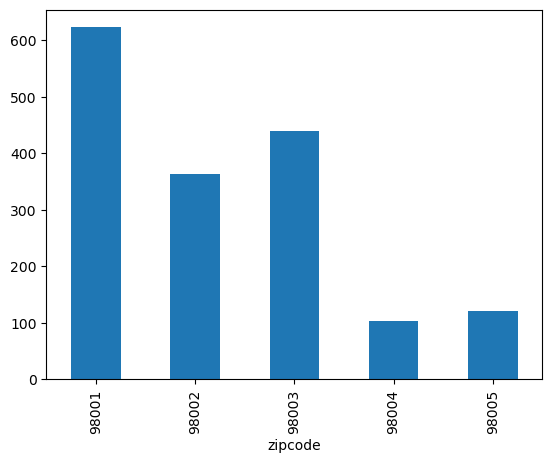

In [328]:
zipcodes_grouped['zipcode'].count().head().plot(kind = 'bar')

<Axes: xlabel='zipcode'>

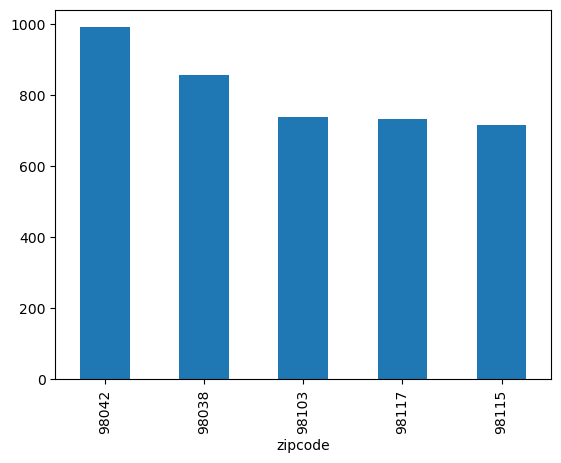

In [275]:
zipcodes_grouped['zipcode'].count().sort_values(ascending = False).head().plot(kind = 'bar')

In [298]:
price_bins = [0, 500000, 1000000, 1500000, 2000000, 2305000]
bin_labels = ['0-500000', '500000-1000000', '1000000-1500,000', 
              '1500000-2000000', '2000000-2305000']
develop_houses['price_bins'] = pd.cut(develop_houses['price'],
                                    bins = price_bins, labels = bin_labels)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_6448\40383034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  develop_houses['price_bins'] = pd.cut(develop_houses['price'],


In [359]:
develop_houses.groupby(by = ['price_bins', 'zipcode']).count().sort_values(by = 'city', ascending = False).head().sum()

price            2937
bedrooms         2937
bathrooms        2937
sqft_living      2937
sqft_lot         2937
floors           2937
waterfront       2937
greenbelt        2937
nuisance         2937
condition        2937
grade            2937
sqft_above       2937
sqft_basement    2937
sqft_garage      2937
sqft_patio       2937
yr_built         2937
yr_renovated     2937
lat              2937
long             2937
sold_year        2937
sold_month       2937
age_sold         2937
renovated        2937
city             2937
dtype: int64

<Axes: xlabel='price_bins'>

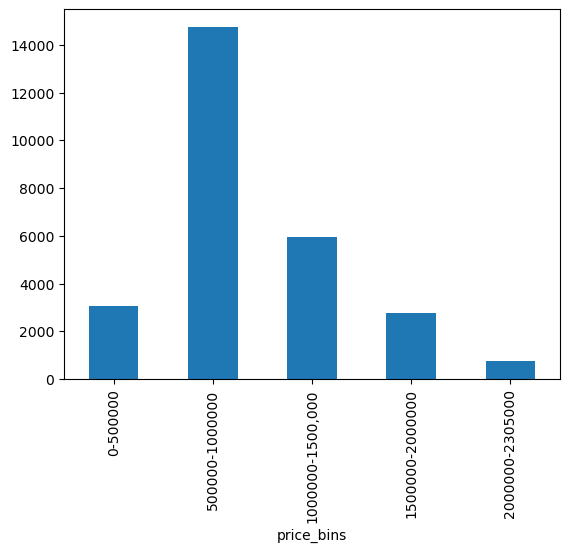

In [339]:
price_grouped = develop_houses.groupby(by = 'price_bins')
price_grouped['price'].count().plot(kind = 'bar')

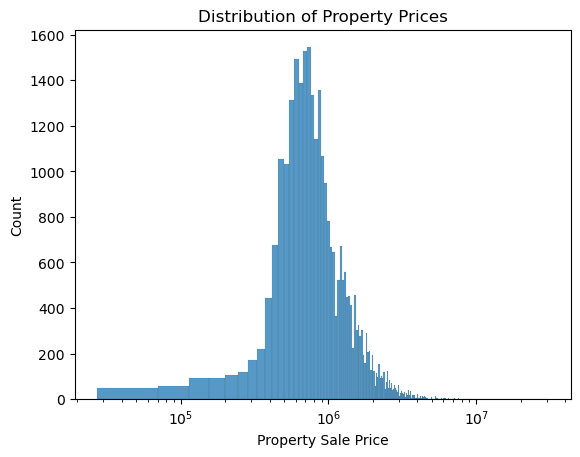

In [513]:
fig, ax = plt.subplots()
ax = sns.histplot(x = 'price', data = housing_data)
ax.set_xscale('log')
ax.set_xlabel('Property Sale Price')
ax.set_title('Distribution of Property Prices')
plt.savefig("propsaleprice.jpg", dpi = 300)

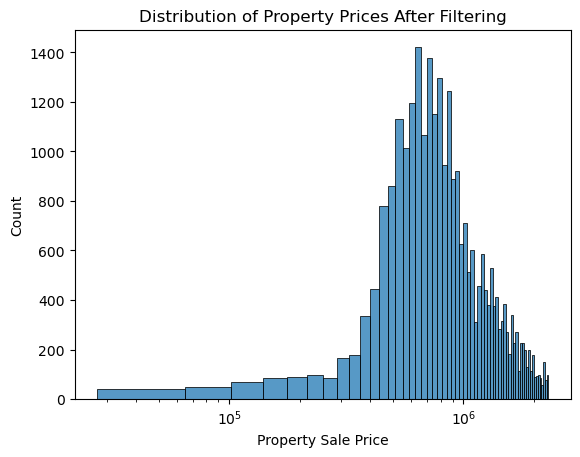

In [438]:
fig, ax = plt.subplots()
ax = sns.histplot(x = 'price', data = develop_houses)
ax.set_xscale('log')
ax.set_xlabel('Property Sale Price')
ax.set_title('Distribution of Property Prices After Filtering')
plt.savefig("filterpropsales.jpg", dpi = 300)

In [516]:
housing_data['price'].mode()

0    650000.0
Name: price, dtype: float64

## Conclusions

In this notebook, we have outlined our exploratory data analysis workflow. To better understand the characteristics of properties in relation to sale price, we have broken up features into different subgroups including:
- `prop_infra` | `condition`, `grade`, and `renovated`
- `interior_feat` | `bedrooms`, `bathrooms`, `sqft_living`, `floors`, `sqft_above`, `sqft_basement`
- `exter_feat` |`sqft_lot`, `sqft_garage`, `sqft_patio`
- `envir_feat` | `waterfront`, `greenbelt`, `nuisance`
- `geo_feat` | `zipcode`, `city`

What features are worth considering for a linear regression model?

So far, we have identified single characteristics for properties in relation to property sale price. However, further work is needed to understand the multicollinearality between these features in order to build an accurate predictive model. 